In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the Hypothyroid data

Hypothyroid_data = pd.read_csv(r"C:\Users\DELL\Documents\hypothyroid.csv", header=0)

# Copy the data to back-up file

Hypothyroid_data_bk = Hypothyroid_data.copy()
Hypothyroid_data_bk1 = Hypothyroid_data.copy()

# Display first five records

Hypothyroid_data.head()

,sno,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,1,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,2,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other,P
2,3,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,4,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other,P
4,5,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


In [3]:
del Hypothyroid_data['TBG']

In [4]:
Hypothyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sno                        3772 non-null   int64  
 1   age                        3772 non-null   int64  
 2   sex                        3622 non-null   object 
 3   on thyroxine               3772 non-null   object 
 4   query on thyroxine         3772 non-null   object 
 5   on antithyroid medication  3772 non-null   object 
 6   sick                       3772 non-null   object 
 7   pregnant                   3772 non-null   object 
 8   thyroid surgery            3772 non-null   object 
 9   I131 treatment             3772 non-null   object 
 10  query hypothyroid          3772 non-null   object 
 11  query hyperthyroid         3772 non-null   object 
 12  lithium                    3772 non-null   object 
 13  goitre                     3772 non-null   objec

In [5]:
# Count the target or dependent variable by '0', '1' & their proportion (>= 10 : 1, then the dataset is imbalance dataset)

Hypothyroid_data_count = Hypothyroid_data.binaryClass.value_counts()
print('Class 0:',Hypothyroid_data_count[0])
print('Class 1:', Hypothyroid_data_count[1])
print('Proportion:', round(Hypothyroid_data_count[0] / Hypothyroid_data_count[1], 2), ': 1')
print('Total Records:', len(Hypothyroid_data))

Class 0: 3481
Class 1: 291
Proportion: 11.96 : 1
Total Records: 3772


In [6]:
Hypothyroid_data.isnull().sum()

sno                            0
age                            0
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int

In [7]:
for i in Hypothyroid_data.columns:
    print((Hypothyroid_data[i].isnull().sum())/len(Hypothyroid_data)*100)

0.0
0.0
3.9766702014846236
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
9.782608695652174
0.0
20.387062566277837
0.0
6.1240721102863205
0.0
10.25980911983033
0.0
10.2067868504772
0.0
0.0
0.0


<AxesSubplot:>

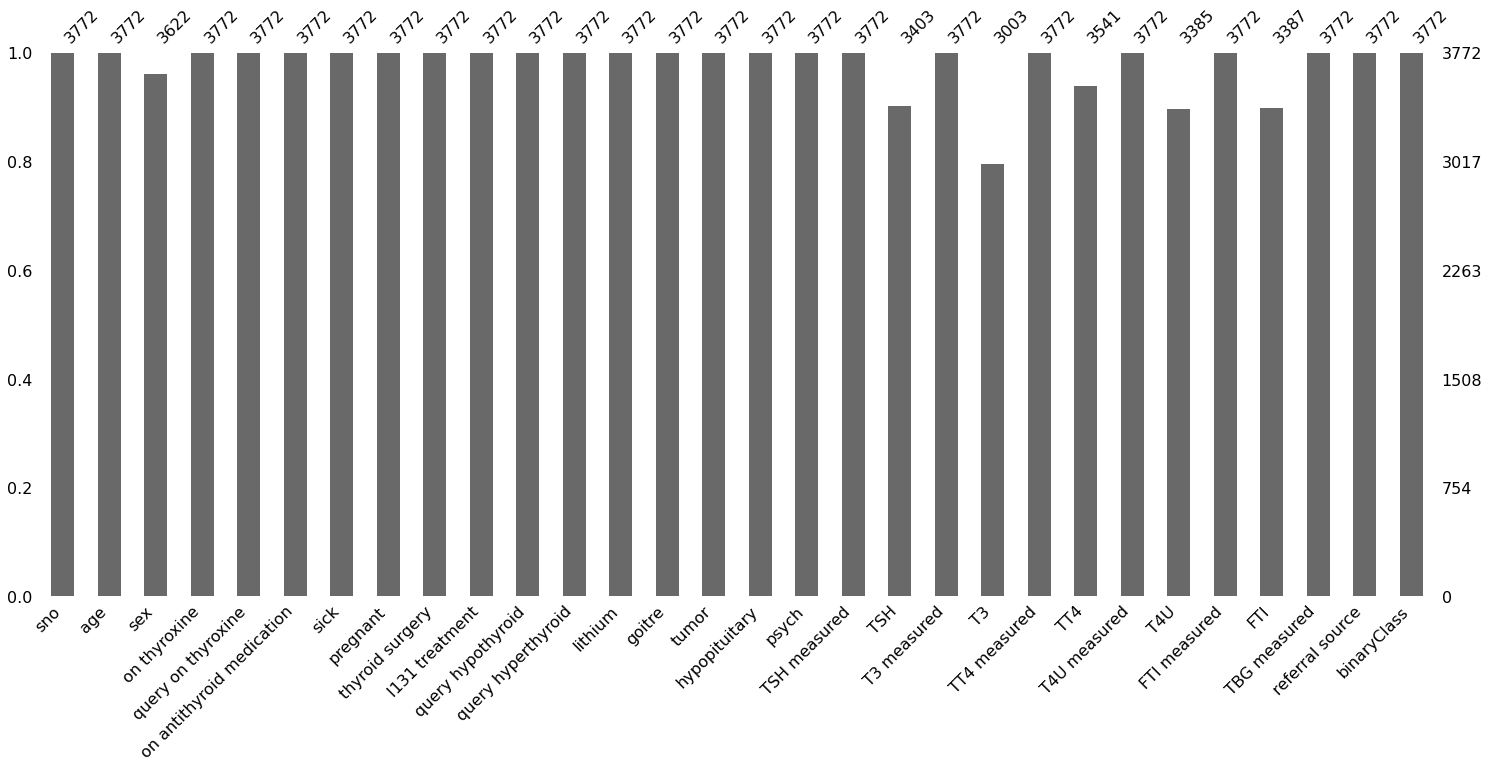

In [8]:
#missingno is  a simple python library that represents a series of visualization

import missingno as msno

msno.bar(Hypothyroid_data)

In [9]:
#Display the unique values by vount for 'sex'
Hypothyroid_data['sex'].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [10]:
#Display the unique values by vount for 
Hypothyroid_data['on thyroxine'].value_counts()

f    3308
t     464
Name: on thyroxine, dtype: int64

In [11]:
#Display the unique values by vount for
Hypothyroid_data['query on thyroxine'].value_counts()

f    3722
t      50
Name: query on thyroxine, dtype: int64

In [12]:
#Display the unique values by vount for
Hypothyroid_data['on antithyroid medication'].value_counts()

f    3729
t      43
Name: on antithyroid medication, dtype: int64

In [13]:
#Display the unique values by vount for
Hypothyroid_data['sick'].value_counts()

f    3625
t     147
Name: sick, dtype: int64

In [14]:
#Display the unique values by vount for
Hypothyroid_data['pregnant'].value_counts()

f    3719
t      53
Name: pregnant, dtype: int64

In [15]:
#Display the unique values by vount for
Hypothyroid_data['thyroid surgery'].value_counts()

f    3719
t      53
Name: thyroid surgery, dtype: int64

In [16]:
#Display the unique values by vount for
Hypothyroid_data['I131 treatment'].value_counts()

f    3713
t      59
Name: I131 treatment, dtype: int64

In [17]:
#Display the unique values by vount for
Hypothyroid_data['query hypothyroid'].value_counts()

f    3538
t     234
Name: query hypothyroid, dtype: int64

In [18]:
#Display the unique values by vount for
Hypothyroid_data['lithium'].value_counts()

f    3754
t      18
Name: lithium, dtype: int64

In [19]:
#Display the unique values by vount for
Hypothyroid_data['goitre'].value_counts()

f    3738
t      34
Name: goitre, dtype: int64

In [20]:
#Display the unique values by vount for
Hypothyroid_data['tumor'].value_counts()

f    3676
t      96
Name: tumor, dtype: int64

In [21]:
#Display the unique values by vount for
Hypothyroid_data['hypopituitary'].value_counts()

f    3771
t       1
Name: hypopituitary, dtype: int64

In [22]:
#Display the unique values by vount for
Hypothyroid_data['psych'].value_counts()

f    3588
t     184
Name: psych, dtype: int64

In [23]:
#Display the unique values by vount for
Hypothyroid_data['TSH measured'].value_counts()

t    3403
f     369
Name: TSH measured, dtype: int64

In [24]:
#Display the unique values by vount for
Hypothyroid_data['T3 measured'].value_counts()

t    3003
f     769
Name: T3 measured, dtype: int64

In [25]:
#Display the unique values by vount for
Hypothyroid_data['TT4 measured'].value_counts()

t    3541
f     231
Name: TT4 measured, dtype: int64

In [26]:
#Display the unique values by vount for
Hypothyroid_data['T4U measured'].value_counts()

t    3385
f     387
Name: T4U measured, dtype: int64

In [27]:
#Display the unique values by vount for
Hypothyroid_data['FTI measured'].value_counts()

t    3387
f     385
Name: FTI measured, dtype: int64

In [28]:
#Display the unique values by vount for
Hypothyroid_data['TBG measured'].value_counts()

f    3772
Name: TBG measured, dtype: int64

In [29]:
#Display the unique values by vount for
Hypothyroid_data['referral source'].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [30]:
#Display the unique values by vount for
Hypothyroid_data['binaryClass'].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [31]:
# SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)

from sklearn.impute import SimpleImputer

imputer_si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

Hypothyroid_data['sex'] = imputer_si.fit_transform(Hypothyroid_data[['sex']])





In [32]:
#Using KNN Imputer to address the Driver_Age missing values

# KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', 
# copy=True, add_indicator=False)


from sklearn.impute import KNNImputer

imputer_knn = KNNImputer(missing_values=np.nan)

#Fill the missing values for 'Driver_Age'

Hypothyroid_data['TSH'] = imputer_knn.fit_transform(Hypothyroid_data[['TSH']])
Hypothyroid_data['T3'] = imputer_knn.fit_transform(Hypothyroid_data[['T3']])
Hypothyroid_data['TT4'] = imputer_knn.fit_transform(Hypothyroid_data[['TT4']])
Hypothyroid_data['T4U'] = imputer_knn.fit_transform(Hypothyroid_data[['T4U']])
Hypothyroid_data['FTI'] = imputer_knn.fit_transform(Hypothyroid_data[['FTI']])



In [33]:
Hypothyroid_data.isnull().sum()

sno                          0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
referral source              0
binaryClass                  0
dtype: int64

In [34]:
#Use LabelEncoder for target variable

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Hypothyroid_data['sex']                       = LE.fit_transform(Hypothyroid_data['sex'])
Hypothyroid_data['on thyroxine'] = LE.fit_transform(Hypothyroid_data['on thyroxine'])
Hypothyroid_data['query on thyroxine'] = LE.fit_transform(Hypothyroid_data['query on thyroxine'])
Hypothyroid_data['on antithyroid medication'] = LE.fit_transform(Hypothyroid_data['on antithyroid medication'])
Hypothyroid_data['sick'] = LE.fit_transform(Hypothyroid_data['sick'])
Hypothyroid_data['pregnant'] = LE.fit_transform(Hypothyroid_data['pregnant'])
Hypothyroid_data['thyroid surgery'] = LE.fit_transform(Hypothyroid_data['thyroid surgery'])
Hypothyroid_data['I131 treatment'] = LE.fit_transform(Hypothyroid_data['I131 treatment'])
Hypothyroid_data['query hypothyroid'] = LE.fit_transform(Hypothyroid_data['query hypothyroid'])
Hypothyroid_data['query hyperthyroid'] = LE.fit_transform(Hypothyroid_data['query hyperthyroid'])
Hypothyroid_data['lithium'] = LE.fit_transform(Hypothyroid_data['lithium'])
Hypothyroid_data['goitre'] = LE.fit_transform(Hypothyroid_data['goitre'])
Hypothyroid_data['tumor'] = LE.fit_transform(Hypothyroid_data['tumor'])
Hypothyroid_data['hypopituitary'] = LE.fit_transform(Hypothyroid_data['hypopituitary'])
Hypothyroid_data['psych'] = LE.fit_transform(Hypothyroid_data['psych'])
Hypothyroid_data['TSH measured'] = LE.fit_transform(Hypothyroid_data['TSH measured'])
Hypothyroid_data['T3 measured'] = LE.fit_transform(Hypothyroid_data['T3 measured'])
Hypothyroid_data['TT4 measured'] = LE.fit_transform(Hypothyroid_data['TT4 measured'])
Hypothyroid_data['T4U measured'] = LE.fit_transform(Hypothyroid_data['T4U measured'])
Hypothyroid_data['FTI measured'] = LE.fit_transform(Hypothyroid_data['FTI measured'])
Hypothyroid_data['TBG measured'] = LE.fit_transform(Hypothyroid_data['TBG measured'])
Hypothyroid_data['referral source'] = LE.fit_transform(Hypothyroid_data['referral source'])
Hypothyroid_data['binaryClass'] = LE.fit_transform(Hypothyroid_data['binaryClass'])


In [35]:
#Identify the Independent and Target variables

IndepVar = []
for col in Hypothyroid_data.columns:
    if col != 'binaryClass':
        IndepVar.append(col)

TargetVar = 'binaryClass'

x = Hypothyroid_data[IndepVar]
y = Hypothyroid_data[TargetVar]

In [36]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.15)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(4003, 29)
(4003,)


In [37]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [38]:
# Load the Results dataset

CSResults = pd.read_csv(r"C:\Users\DELL\Documents\HTResults.csv", header=0)

CSResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [39]:
knn_results = pd.read_csv(r"C:\Users\DELL\Documents\KNN_Results.csv",header=0)

knn_results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[1019   32]
 [  54   27]]
Outcome values : 
 1019 32 54 27
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.97      0.96      1051
           0       0.46      0.33      0.39        81

    accuracy                           0.92      1132
   macro avg       0.70      0.65      0.67      1132
weighted avg       0.91      0.92      0.92      1132

Accuracy : 92.4 %
Precision : 95.0 %
Recall : 97.0 %
F1 Score : 0.96
Specificity or True Negative Rate : 33.3 %
Balanced Accuracy : 65.2 %
MCC : 0.351
roc_auc_score: 0.651


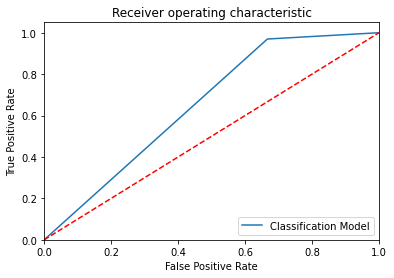

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[969  82]
 [ 41  40]]
Outcome values : 
 969 82 41 40
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.92      0.94      1051
           0       0.33      0.49      0.39        81

    accuracy                           0.89      1132
   macro avg       0.64      0.71      0.67      1132
weighted avg       0.91      0.89      0.90      1132

Accuracy : 89.1 %
Precision : 95.9 %
Recall : 92.2 %
F1 Score : 0.94
Specificity or True Negative Rate : 49.4 %
Balanced Accuracy : 70.8 %
MCC : 0.346
roc_auc_score: 0.708


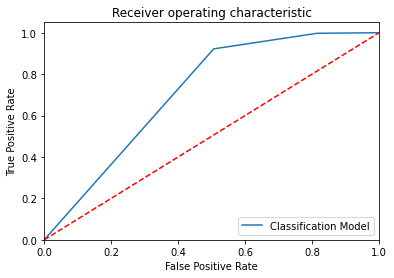

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[1041   10]
 [  62   19]]
Outcome values : 
 1041 10 62 19
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.99      0.97      1051
           0       0.66      0.23      0.35        81

    accuracy                           0.94      1132
   macro avg       0.80      0.61      0.66      1132
weighted avg       0.92      0.94      0.92      1132

Accuracy : 93.6 %
Precision : 94.4 %
Recall : 99.0 %
F1 Score : 0.967
Specificity or True Negative Rate : 23.5 %
Balanced Accuracy : 61.2 %
MCC : 0.367
roc_auc_score: 0.613


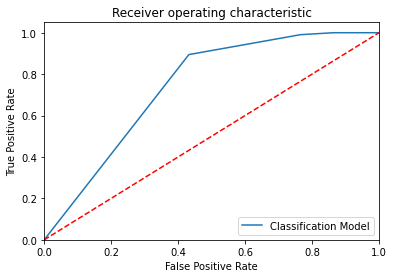

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[1034   17]
 [  60   21]]
Outcome values : 
 1034 17 60 21
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.98      0.96      1051
           0       0.55      0.26      0.35        81

    accuracy                           0.93      1132
   macro avg       0.75      0.62      0.66      1132
weighted avg       0.92      0.93      0.92      1132

Accuracy : 93.2 %
Precision : 94.5 %
Recall : 98.4 %
F1 Score : 0.964
Specificity or True Negative Rate : 25.9 %
Balanced Accuracy : 62.1 %
MCC : 0.348
roc_auc_score: 0.622


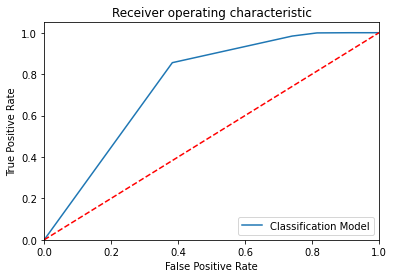

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[1048    3]
 [  66   15]]
Outcome values : 
 1048 3 66 15
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      1051
           0       0.83      0.19      0.30        81

    accuracy                           0.94      1132
   macro avg       0.89      0.59      0.64      1132
weighted avg       0.93      0.94      0.92      1132

Accuracy : 93.9 %
Precision : 94.1 %
Recall : 99.7 %
F1 Score : 0.968
Specificity or True Negative Rate : 18.5 %
Balanced Accuracy : 59.1 %
MCC : 0.376
roc_auc_score: 0.591


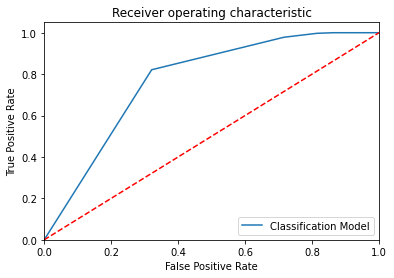

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[1048    3]
 [  65   16]]
Outcome values : 
 1048 3 65 16
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      1051
           0       0.84      0.20      0.32        81

    accuracy                           0.94      1132
   macro avg       0.89      0.60      0.64      1132
weighted avg       0.93      0.94      0.92      1132

Accuracy : 94.0 %
Precision : 94.2 %
Recall : 99.7 %
F1 Score : 0.969
Specificity or True Negative Rate : 19.8 %
Balanced Accuracy : 59.8 %
MCC : 0.391
roc_auc_score: 0.597


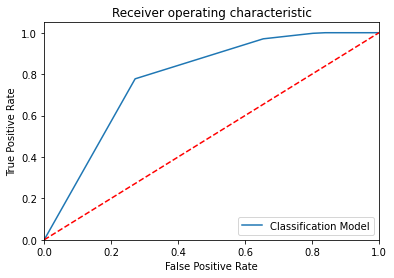

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[1051    0]
 [  67   14]]
Outcome values : 
 1051 0 67 14
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      1051
           0       1.00      0.17      0.29        81

    accuracy                           0.94      1132
   macro avg       0.97      0.59      0.63      1132
weighted avg       0.94      0.94      0.92      1132

Accuracy : 94.1 %
Precision : 94.0 %
Recall : 100.0 %
F1 Score : 0.969
Specificity or True Negative Rate : 17.3 %
Balanced Accuracy : 58.6 %
MCC : 0.403
roc_auc_score: 0.586


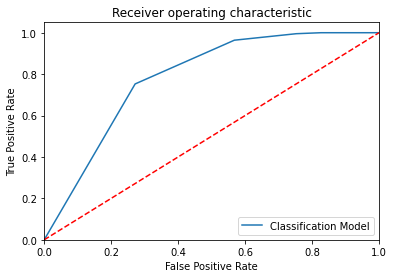

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[1051    0]
 [  64   17]]
Outcome values : 
 1051 0 64 17
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      1051
           0       1.00      0.21      0.35        81

    accuracy                           0.94      1132
   macro avg       0.97      0.60      0.66      1132
weighted avg       0.95      0.94      0.93      1132

Accuracy : 94.3 %
Precision : 94.3 %
Recall : 100.0 %
F1 Score : 0.97
Specificity or True Negative Rate : 21.0 %
Balanced Accuracy : 60.5 %
MCC : 0.445
roc_auc_score: 0.605


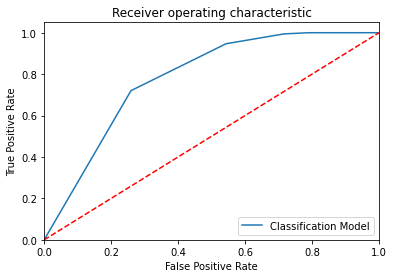

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[1051    0]
 [  71   10]]
Outcome values : 
 1051 0 71 10
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      1051
           0       1.00      0.12      0.22        81

    accuracy                           0.94      1132
   macro avg       0.97      0.56      0.59      1132
weighted avg       0.94      0.94      0.91      1132

Accuracy : 93.7 %
Precision : 93.7 %
Recall : 100.0 %
F1 Score : 0.967
Specificity or True Negative Rate : 12.3 %
Balanced Accuracy : 56.2 %
MCC : 0.34
roc_auc_score: 0.562


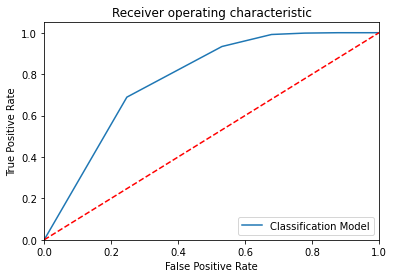

In [40]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 10, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative':tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    knn_results = knn_results.append(new_row, ignore_index=True)
    #------------------------------------------------------------------------------

In [41]:
knn_results.head(30)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,1019,32,54,27,0.924,0.95,0.97,0.96,0.333,0.351,0.651443,0.652
1,KNeighborsClassifier(n_neighbors=2),2,969,82,41,40,0.891,0.959,0.922,0.94,0.494,0.346,0.707903,0.708
2,KNeighborsClassifier(n_neighbors=3),3,1041,10,62,19,0.936,0.944,0.99,0.967,0.235,0.367,0.612527,0.612
3,KNeighborsClassifier(n_neighbors=4),4,1034,17,60,21,0.932,0.945,0.984,0.964,0.259,0.348,0.621542,0.621
4,KNeighborsClassifier(),5,1048,3,66,15,0.939,0.941,0.997,0.968,0.185,0.376,0.591165,0.591
5,KNeighborsClassifier(n_neighbors=6),6,1048,3,65,16,0.94,0.942,0.997,0.969,0.198,0.391,0.597338,0.598
6,KNeighborsClassifier(n_neighbors=7),7,1051,0,67,14,0.941,0.94,1.0,0.969,0.173,0.403,0.58642,0.586
7,KNeighborsClassifier(n_neighbors=8),8,1051,0,64,17,0.943,0.943,1.0,0.97,0.21,0.445,0.604938,0.605
8,KNeighborsClassifier(n_neighbors=9),9,1051,0,71,10,0.937,0.937,1.0,0.967,0.123,0.34,0.561728,0.562


Model Name:  LogisticRegression()
Confusion matrix : 
 [[1046    5]
 [  39   42]]
Outcome values : 
 1046 5 39 42
Classification report : 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98      1051
           0       0.89      0.52      0.66        81

    accuracy                           0.96      1132
   macro avg       0.93      0.76      0.82      1132
weighted avg       0.96      0.96      0.96      1132

Accuracy : 96.1 %
Precision : 96.4 %
Recall : 99.5 %
F1 Score : 0.979
Specificity or True Negative Rate : 51.9 %
Balanced Accuracy : 75.7 %
roc_auc_score: 0.757


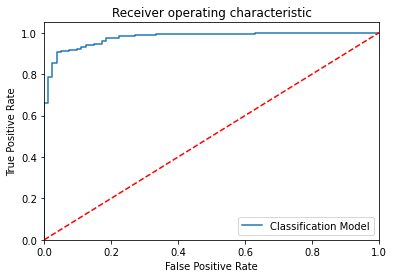

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[1051    0]
 [   2   79]]
Outcome values : 
 1051 0 2 79
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1051
           0       1.00      0.98      0.99        81

    accuracy                           1.00      1132
   macro avg       1.00      0.99      0.99      1132
weighted avg       1.00      1.00      1.00      1132

Accuracy : 99.8 %
Precision : 99.8 %
Recall : 100.0 %
F1 Score : 0.999
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 98.8 %
roc_auc_score: 0.988


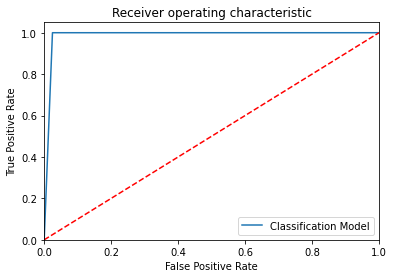

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[1049    2]
 [   3   78]]
Outcome values : 
 1049 2 3 78
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1051
           0       0.97      0.96      0.97        81

    accuracy                           1.00      1132
   macro avg       0.99      0.98      0.98      1132
weighted avg       1.00      1.00      1.00      1132

Accuracy : 99.6 %
Precision : 99.7 %
Recall : 99.8 %
F1 Score : 0.998
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 98.0 %
roc_auc_score: 0.981


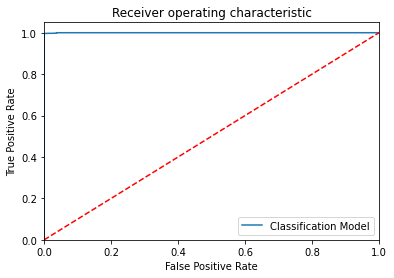

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[1049    2]
 [  27   54]]
Outcome values : 
 1049 2 27 54
Classification report : 
               precision    recall  f1-score   support

           1       0.97      1.00      0.99      1051
           0       0.96      0.67      0.79        81

    accuracy                           0.97      1132
   macro avg       0.97      0.83      0.89      1132
weighted avg       0.97      0.97      0.97      1132

Accuracy : 97.4 %
Precision : 97.5 %
Recall : 99.8 %
F1 Score : 0.986
Specificity or True Negative Rate : 66.7 %
Balanced Accuracy : 83.2 %
roc_auc_score: 0.832


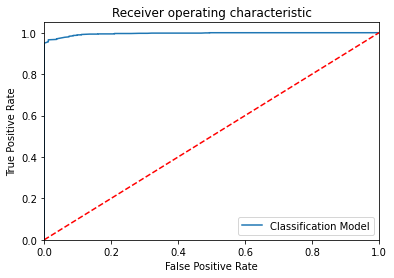

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[1051    0]
 [  64   17]]
Outcome values : 
 1051 0 64 17
Classification report : 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      1051
           0       1.00      0.21      0.35        81

    accuracy                           0.94      1132
   macro avg       0.97      0.60      0.66      1132
weighted avg       0.95      0.94      0.93      1132

Accuracy : 94.3 %
Precision : 94.3 %
Recall : 100.0 %
F1 Score : 0.97
Specificity or True Negative Rate : 21.0 %
Balanced Accuracy : 60.5 %
roc_auc_score: 0.605


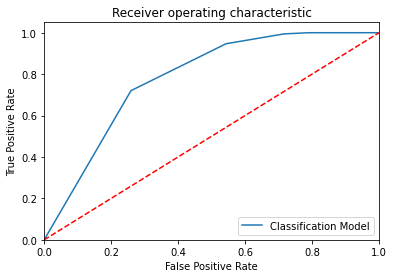

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[1051    0]
 [  81    0]]
Outcome values : 
 1051 0 81 0
Classification report : 
               precision    recall  f1-score   support

           1       0.93      1.00      0.96      1051
           0       0.00      0.00      0.00        81

    accuracy                           0.93      1132
   macro avg       0.46      0.50      0.48      1132
weighted avg       0.86      0.93      0.89      1132

Accuracy : 92.8 %
Precision : 92.8 %
Recall : 100.0 %
F1 Score : 0.963
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


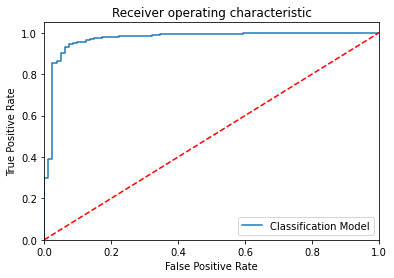

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier()
Confusion matrix : 
 [[1051    0]
 [   3   78]]
Outcome values : 
 1051 0 3 78
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1051
           0       1.00      0.96      0.98        81

    accuracy                           1.00      1132
   macro avg       1.00      0.98      0.99      1132
weighted avg       1.00      1.00      1.00      1132

Accuracy : 99.7 %
Precision : 99.7 %
Recall : 100.0 %
F1 Score : 0.999
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 98.2 %
roc_auc_score: 0.981


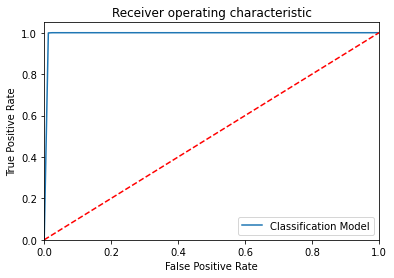

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[1051    0]
 [   3   78]]
Outcome values : 
 1051 0 3 78
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1051
           0       1.00      0.96      0.98        81

    accuracy                           1.00      1132
   macro avg       1.00      0.98      0.99      1132
weighted avg       1.00      1.00      1.00      1132

Accuracy : 99.7 %
Precision : 99.7 %
Recall : 100.0 %
F1 Score : 0.999
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 98.2 %
roc_auc_score: 0.981


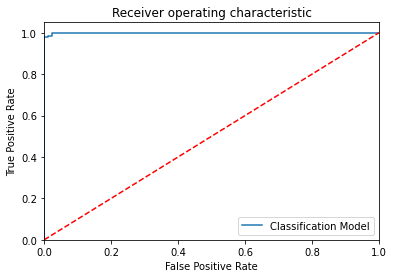

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[1051    0]
 [   2   79]]
Outcome values : 
 1051 0 2 79
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1051
           0       1.00      0.98      0.99        81

    accuracy                           1.00      1132
   macro avg       1.00      0.99      0.99      1132
weighted avg       1.00      1.00      1.00      1132

Accuracy : 99.8 %
Precision : 99.8 %
Recall : 100.0 %
F1 Score : 0.999
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 98.8 %
roc_auc_score: 0.988


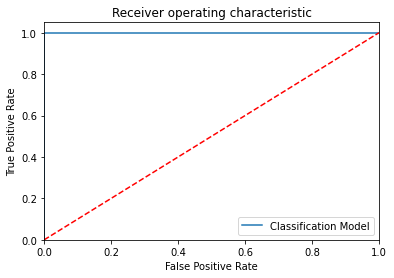

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[598 453]
 [  8  73]]
Outcome values : 
 598 453 8 73
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.57      0.72      1051
           0       0.14      0.90      0.24        81

    accuracy                           0.59      1132
   macro avg       0.56      0.74      0.48      1132
weighted avg       0.93      0.59      0.69      1132

Accuracy : 59.3 %
Precision : 98.7 %
Recall : 56.9 %
F1 Score : 0.722
Specificity or True Negative Rate : 90.1 %
Balanced Accuracy : 73.5 %
roc_auc_score: 0.735


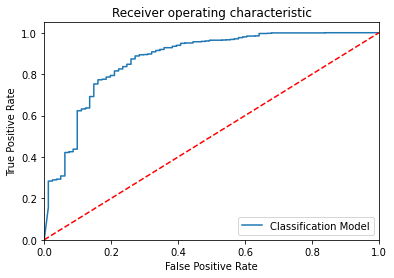

-----------------------------------------------------------------------------------------------------


In [42]:
# Build the Calssification models with Over Sampling and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

import math

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=8)
ModelSVM = SVC(probability=True)
ModelBAG = BaggingClassifier(base_estimator=None, n_estimators=10,  max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None,  random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier()
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithm

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / math.sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [43]:
CSResults.head(30)

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1046,5,39,42,0.961,0.964,0.995,0.979,0.519,MCC,0.756881,0.757
1,DecisionTreeClassifier(),1051,0,2,79,0.998,0.998,1.0,0.999,0.975,MCC,0.987654,0.988
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1049,2,3,78,0.996,0.997,0.998,0.998,0.963,MCC,0.98053,0.98
3,"(ExtraTreeClassifier(random_state=500654477), ...",1049,2,27,54,0.974,0.975,0.998,0.986,0.667,MCC,0.832382,0.832
4,KNeighborsClassifier(n_neighbors=8),1051,0,64,17,0.943,0.943,1.0,0.97,0.21,MCC,0.604938,0.605
5,SVC(probability=True),1051,0,81,0,0.928,0.928,1.0,0.963,0.0,MCC,0.5,0.5
6,(DecisionTreeClassifier(random_state=608372448...,1051,0,3,78,0.997,0.997,1.0,0.999,0.963,MCC,0.981481,0.982
7,([DecisionTreeRegressor(criterion='friedman_ms...,1051,0,3,78,0.997,0.997,1.0,0.999,0.963,MCC,0.981481,0.982
8,LGBMClassifier(),1051,0,2,79,0.998,0.998,1.0,0.999,0.975,MCC,0.987654,0.988
9,GaussianNB(),598,453,8,73,0.593,0.987,0.569,0.722,0.901,MCC,0.735108,0.735


In [44]:
#LGBM CLASSIFIER IS BEST ALGORITHM

In [55]:
matrix=Hypothyroid_data.corr() 
Catos = ['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'referral source',]
for cato in Catos:
    Hypothyroid_data[cato] =Hypothyroid_data[cato].astype('category').cat.codes 

In [47]:
Hypothyroid_data.columns

Index(['sno', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'referral source',
       'binaryClass'],
      dtype='object')

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
3767    1
3768    1
3769    1
3770    1
3771    1
Name: binaryClass, Length: 3772, dtype: int32>

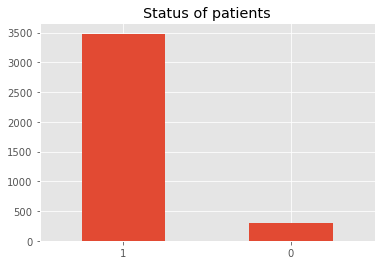

In [46]:
plt.style.use('ggplot')
Hypothyroid_data['binaryClass'].value_counts().plot.bar(title="Status of patients",rot=0)
display(Hypothyroid_data['binaryClass'].value_counts)

68qeudsnfsirw0olmcdmscnfsofi


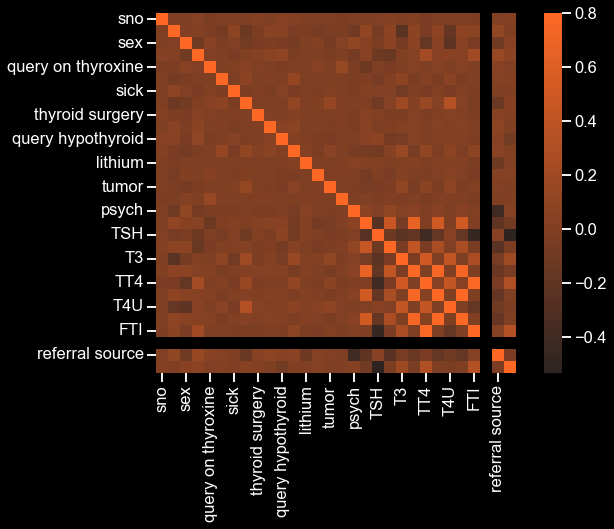

In [57]:
import seaborn as sns
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
matrix= Hypothyroid_data.corr() 
print("68qeudsnfsirw0olmcdmscnfsofi")
fig, ax = plt.subplots(figsize=(9,6))
cmap = sns.dark_palette("#fd6925", as_cmap=True)
fig.tight_layout()
HeatM = sns.heatmap(matrix,vmax=.8,square=True, cmap=cmap)
plt.rcParams['figure.figsize']=(10,10)
fig = HeatM.get_figure()
fig.savefig('output.png', transparent=True)